# From Biological to Articial Neurons

### Biological Neurons

### Logical Computations with Neurons

### The Perceptron

In [42]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [43]:
iris = load_iris()

In [44]:
X = iris.data[:, (2,3)] # petal length, petal width
y = (iris.target == 0).astype(np.int32) # Iris Setosa

In [45]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [46]:
y_pred = per_clf.predict([[2, 0.5]])

In [47]:
def plot_data_set(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0],'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1],'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)   

In [48]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, axes=[0, 7.5, 0, 3], plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = model.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.contour(x1, x2, y_pred, alpha=0.8, cmap='Greys')
    if plot_training:
        plt.plot(X[:,0][y==0], X[:,1][y==0],'bs')
        plt.plot(X[:,0][y==1], X[:,1][y==1],'g^')
    plt.axis(axes)



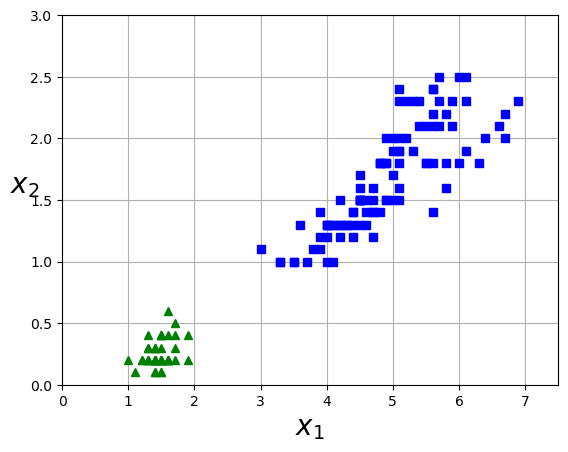

In [49]:
plot_data_set(X, y, [0, 7.5, 0, 3])

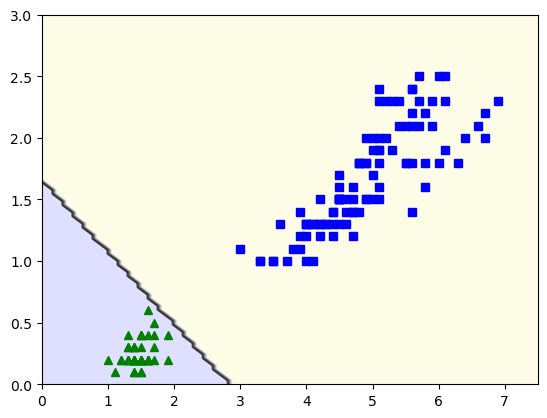

In [50]:
plot_decision_boundary(per_clf,X, y, plot_training=True)

### Multi-Layer Perceptron and Backpropagation

### Regression MLPs

### Classification MLPs

# Implementing MLPs with Keras

### Installing TensorFlow 2

In [11]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.12.0'

In [12]:
keras.__version__

'2.12.0'

### Building an Image Classfier Using the Sequential API

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [8]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
class_names = ['Áo sơ mi', 'Quần dài', 'Áo len', 'Váy', 'Áo khoác', 
               'Sandal', 'Áo sơ mi', 'Giày sneaker', 'Túi xách', 'Ủng']

In [16]:
class_names[y_train[11]]

'Quần dài'

In [17]:
import matplotlib.pyplot as plt
import matplotlib
def plot_fashion_item(image):
    image = image.reshape(28, 28)
    plt.imshow(image, cmap=matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.show()

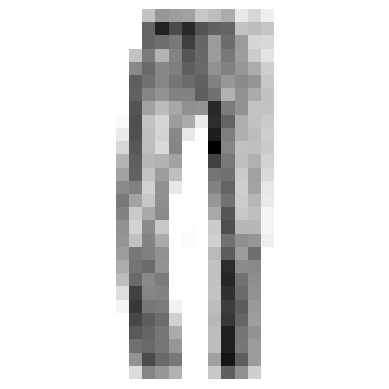

In [18]:
plot_fashion_item(X_train[11])

In [19]:
model = keras.models.Sequential() # Tạo ra mô hình mạng neural tuần tự
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation=keras.activations.relu),
    keras.layers.Dense(100, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


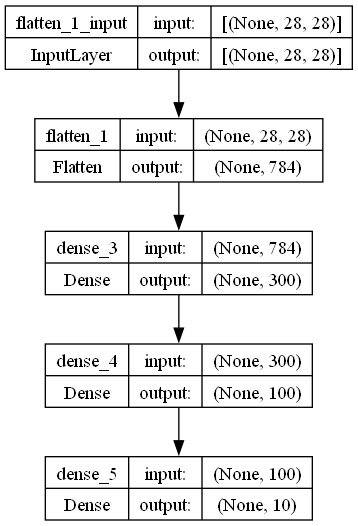

In [22]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [23]:
model.layers

In [24]:
model.layers[1].name

'dense_3'

In [25]:
model.get_layer('dense_3').name

'dense_3'

In [26]:
weights, biases = model.layers[1].get_weights()

In [27]:
weights

array([[-0.03073892,  0.03104944, -0.02145191, ...,  0.01791497,
         0.06808925, -0.03483218],
       [-0.03320952, -0.01957079, -0.07090624, ...,  0.07111602,
        -0.02860263,  0.06326276],
       [ 0.03512393, -0.04906485,  0.07242493, ..., -0.05366088,
        -0.04700109,  0.00731129],
       ...,
       [-0.04237187, -0.03281957, -0.01916618, ...,  0.02541348,
        -0.0653854 , -0.01127503],
       [-0.0284777 ,  0.05098446,  0.04971936, ...,  0.06850021,
        -0.01476471, -0.04409008],
       [-0.00685097, -0.04340579, -0.0154355 , ...,  0.03598247,
        -0.04142761,  0.03317284]], dtype=float32)

In [28]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
weights.shape

(784, 300)

In [30]:
 biases.shape

(300,)

In [31]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd', metrics=['accuracy'])

In [32]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
             optimizer=keras.optimizers.SGD(),
              metrics=keras.metrics.sparse_categorical_accuracy)

In [33]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid), verbose=1)

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7110 - sparse_categorical_accuracy: 0.7676 - val_loss: 0.5466 - val_sparse_categorical_accuracy: 0.8076
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4873 - sparse_categorical_accuracy: 0.8319 - val_loss: 0.4481 - val_sparse_categorical_accuracy: 0.8480
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4434 - sparse_categorical_accuracy: 0.8453 - val_loss: 0.4131 - val_sparse_categorical_accuracy: 0.8626
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4148 - sparse_categorical_accuracy: 0.8558 - val_loss: 0.3930 - val_sparse_categorical_accuracy: 0.8616
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3941 - sparse_categorical_accuracy: 0.8618 - val_loss: 0.3899 - val_sparse_categorical_accuracy: 0.8664
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3780 - spars

In [34]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [35]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


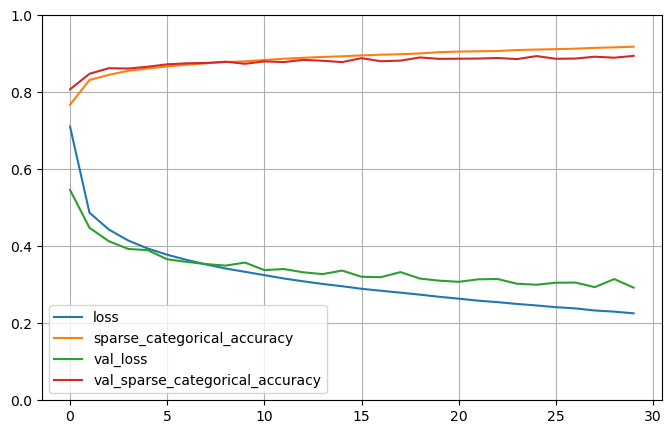

In [36]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 73.9074 - sparse_categorical_accuracy: 0.8340


[73.9073715209961, 0.8339999914169312]

In [38]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

1/1 [==============================] - 0s 112ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
y_pred = np.argmax(model.predict(X_new), axis=-1)

1/1 [==============================] - 0s 34ms/step


In [40]:
y_pred

array([9, 2, 1], dtype=int64)

In [41]:
np.array(class_names)[y_pred]

array(['Ủng', 'Áo len', 'Quần dài'], dtype='<U12')

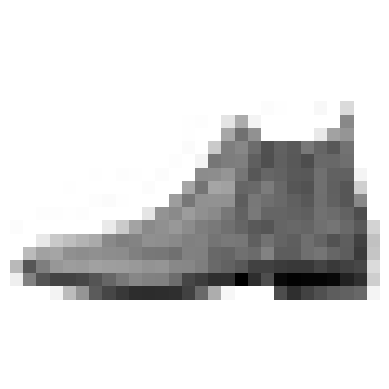

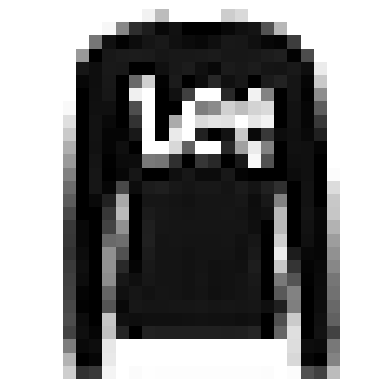

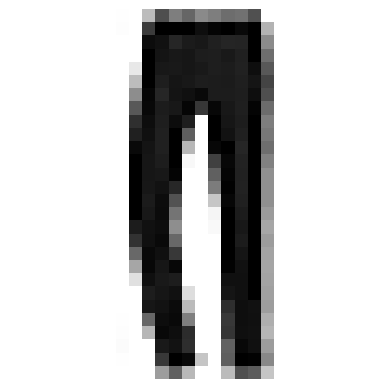

In [42]:
for i in range(3):
    plot_fashion_item(X_test[i])

In [43]:
class_names

['Áo sơ mi',
 'Quần dài',
 'Áo len',
 'Váy',
 'Áo khoác',
 'Sandal',
 'Áo sơ mi',
 'Giày sneaker',
 'Túi xách',
 'Ủng']

### Building a Regression MLP Using the Sequential API

In [44]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [46]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=(8, )),
    keras.layers.Dense(1)
])

In [47]:
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train_scaled, y_train, epochs=50,
                    validation_data=(X_valid_scaled, y_valid), verbose=1)

Epoch 1/50
363/363 [==============================] - 2s 3ms/step - loss: 1.1785 - val_loss: 0.6287
Epoch 2/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5629 - val_loss: 0.5276
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5075 - val_loss: 0.4942
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4844 - val_loss: 0.4661
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4531 - val_loss: 0.4484
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4525 - val_loss: 0.4487
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4348 - val_loss: 0.4337
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4238 - val_loss: 0.4281
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4384 - val_loss: 0.4322
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4181 - val_loss: 0.4185

In [48]:
mse_test = model.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3487


In [49]:
X_new = X_test_scaled[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 72ms/step


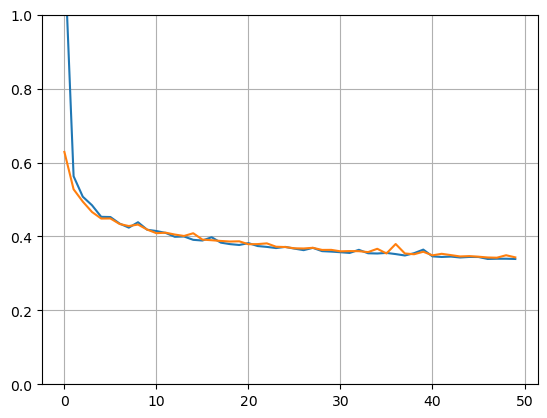

In [50]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Building Complex Models Using the Functional API

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

In [52]:
input_ = keras.layers.Input(shape=(8,))
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [53]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train_scaled, y_train, epochs=20,
                   validation_data=(X_valid_scaled, y_valid), verbose=1)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.9923 - val_loss: 0.7490
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7735 - val_loss: 0.6375
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6203 - val_loss: 0.6003
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5856 - val_loss: 0.5742
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5620 - val_loss: 0.5517
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5432 - val_loss: 0.5358
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5289 - val_loss: 0.5242
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5164 - val_loss: 0.5147
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5062 - val_loss: 0.5046
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4971 - val_loss: 0.4952

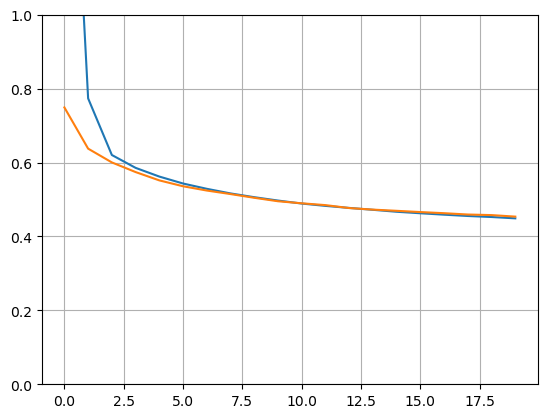

In [54]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [55]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [56]:
model.compile(loss='mse', optimizer='sgd')

X_train_A, X_train_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_valid_A, X_valid_B = X_valid_scaled[:, :5], X_valid_scaled[:, 2:]
X_test_A, X_test_B = X_test_scaled[:, :5], X_test_scaled[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [57]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8972 - val_loss: 0.6048
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5698 - val_loss: 0.5156
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4971 - val_loss: 0.4791
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4711 - val_loss: 0.4586
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4482 - val_loss: 0.4439
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4459 - val_loss: 0.4315
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4308 - val_loss: 0.4247
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4225 - val_loss: 0.4400
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4161 - val_loss: 0.4092
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4093 - val_loss: 0.3983

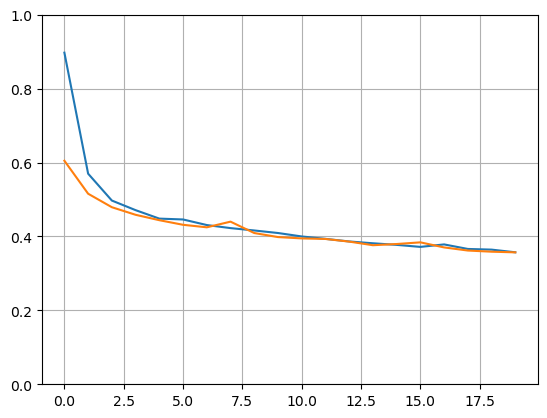

In [58]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [59]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3636


In [60]:
y_pred = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 57ms/step


In [61]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [62]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

In [63]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                   validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 1.0269 - dense_16_loss: 0.8828 - dense_17_loss: 2.3239 - val_loss: 0.6654 - val_dense_16_loss: 0.5927 - val_dense_17_loss: 1.3193
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6413 - dense_16_loss: 0.5806 - dense_17_loss: 1.1883 - val_loss: 0.5847 - val_dense_16_loss: 0.5304 - val_dense_17_loss: 1.0727
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5586 - dense_16_loss: 0.5102 - dense_17_loss: 0.9943 - val_loss: 0.5470 - val_dense_16_loss: 0.5050 - val_dense_17_loss: 0.9254
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5287 - dense_16_loss: 0.4911 - dense_17_loss: 0.8665 - val_loss: 0.5215 - val_dense_16_loss: 0.4875 - val_dense_17_loss: 0.8271
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5077 - dense_16_loss: 0.4772 - dense_17_loss: 0.7821 - val_loss: 0.5024 - val_dense_16_loss: 0.4732 - val_de

In [64]:
total_loss, main_loss, aux_loss = model.evaluate(
 [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.3804 - dense_16_loss: 0.3649 - dense_17_loss: 0.5197


In [65]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 65ms/step


### Building Dynamic Models Using the Subclassing API

In [66]:
# class Wide_and_Deep_Model(keras.models.Model):
#     def __int__(self, units=30, activation='relu', **kwangs):
#         supper().__int__(**kwangs) # handles standard args(e.g., name)
#         # kế thừa những tính chất __init__ từ lớp cha
#         self.hidden1 = keras.layers.Dense(units, activation=activation)
#         self.hidden2 = keras.layers.Dense(units, activation=activation)
#         self.main_output = keras.layers.Dense(1)
#         self.aux_output = keras.layers.Dense(1)
#     def call(self, inputs):
#         input_A, input_B = inputs
#         hidden1 = self.hidden1(input_B)
#         hidden2 = self.hidden2(hidden1)
#         concat = keras.layers.concatenate([input_A, hidden2])
#         main_output = self.main_output(concat)
#         aux_output = self.aux_output
#         return main_output, aux_output
# model = Wide_and_Deep_Model()

### Saving and Restoring a Model

In [67]:
model.save('my_keras_model.h5')

In [68]:
model = keras.models.load_model('my_keras_model.h5')

In [69]:
model.save_weights("my_keras_weights.ckpt")

In [70]:
model.load_weights("my_keras_weights.ckpt")

### Using Callbacks

In [71]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=(8, )),
    keras.layers.Dense(1)
])

In [72]:
model.compile(loss=keras.losses.mean_squared_error,
             optimizer=keras.optimizers.SGD())

In [73]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5') # lưu lại kết quả gần nhất khi đc train
# Lưu lại model gần nhất vừa được train
history = model.fit(X_train_scaled, y_train, epochs=30, callbacks=[checkpoint_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 1.0000
Epoch 2/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5122
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4613
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4469
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4324
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4529
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4191
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4106
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4096
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4246
Epoch 11/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3998
Epoch 12/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3900
Epoch 13/30
363/363 [====

In [74]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
#  Lưu lại model có val_error thấp nhất, bằng save_best_only
history = model.fit(X_train_scaled, y_train, epochs=20,
                   validation_data=(X_valid_scaled, y_valid),
                   callbacks=[checkpoint_cb])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3638 - val_loss: 0.3699
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3720 - val_loss: 0.3669
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3666 - val_loss: 0.3676
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3642 - val_loss: 0.3620
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3665 - val_loss: 0.3645
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3603 - val_loss: 0.3617
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3591 - val_loss: 0.3621
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3574 - val_loss: 0.3682
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3596 - val_loss: 0.3600
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3629 - val_loss: 0.3582

In [75]:
model = keras.models.load_model('my_keras_model.h5') # rollback to best model

In [76]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
# Lưu lại hệ số weight tốt nhất, cũng là model tốt nhất, không cần gọi lại model khi chạy xong

In [77]:
history = model.fit(X_train_scaled, y_train, epochs=100,
                    validation_data=(X_valid_scaled, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3486 - val_loss: 0.3522
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3516 - val_loss: 0.3478
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3476 - val_loss: 0.3475
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3506 - val_loss: 0.3438
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3519 - val_loss: 0.3452
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3414 - val_loss: 0.3415
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3393 - val_loss: 0.3400
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3372 - val_loss: 0.3368
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3363 - val_loss: 0.3385
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3430 - val_lo

In [78]:
class PrintValTrainRaitoCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train : {:.2f}'.format(logs['val_loss'] / logs['loss']))

In [79]:
val_train_raito_cb = PrintValTrainRaitoCallback()
history = model.fit(X_train_scaled, y_train, epochs=1,
               validation_data=(X_valid_scaled, y_valid),
                   callbacks=[val_train_raito_cb])

337/363 [==========================>...] - ETA: 0s - loss: 0.3137
val/train : 1.01
363/363 [==============================] - 1s 2ms/step - loss: 0.3147 - val_loss: 0.3178


### Visualzation Using TensorBoard

In [80]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

In [81]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [82]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train_scaled, y_train, epochs=30,
                   validation_data=(X_valid_scaled, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 2.4235 - val_loss: 1.0633
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8512 - val_loss: 0.7838
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7180 - val_loss: 0.7123
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6659 - val_loss: 0.6685
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6293 - val_loss: 0.6339
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6007 - val_loss: 0.6073
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5778 - val_loss: 0.5860
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5592 - val_loss: 0.5668
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5439 - val_loss: 0.5516
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5314 - val_loss: 0.5399

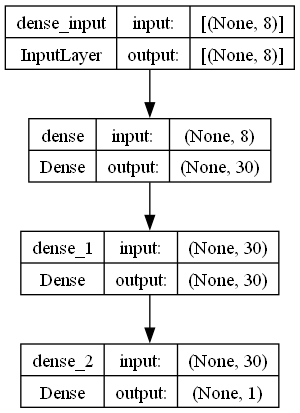

In [83]:
keras.utils.plot_model(model, "my_model.png", show_shapes=True)

# Fine-Tuning Neural Network Hyperparameters

In [98]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=(8,)):
    model = keras.models.Sequential()
    option = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **option))
        option = {}
    model.add(keras.layers.Dense(1, **option))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model


In [99]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25520\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [100]:
keras_reg.fit(X_train_scaled, y_train, epochs=100,
              validation_data=[X_valid_scaled, y_valid],
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.1689 - val_loss: 0.6870
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6896 - val_loss: 0.6311
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5853 - val_loss: 0.5481
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5333 - val_loss: 0.5198
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5075 - val_loss: 0.5003
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4941 - val_loss: 0.4889
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4850 - val_loss: 0.4838
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4758 - val_loss: 0.4955
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4716 - val_loss: 0.4780
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4649 - val_lo

In [121]:
mse_test = keras_reg.score(X_test_scaled, y_test) 

162/162 [==============================] - 0s 1ms/step - loss: 0.3773


In [123]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 22ms/step


In [131]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distrib = {
    'n_hidden': [0,1,2,3],
    'n_neurons': np.arange(1, 100),
    'learning_rate': reciprocal(3e-4, 3e-2),
}

In [132]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distrib, n_iter=10, cv=3)

In [133]:
rnd_search_cv.fit(X_train_scaled, y_train, epochs=100, 
validation_data=(X_valid_scaled, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 3.3460 - val_loss: 1.4786
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.4599 - val_loss: 1.0709
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1045 - val_loss: 0.9462
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9770 - val_loss: 0.8772
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8877 - val_loss: 0.8178
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8227 - val_loss: 0.7704
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7732 - val_loss: 0.7342
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7366 - val_loss: 0.7102
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7120 - val_loss: 0.6892
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6941 - val_lo

Epoch 61/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5005 - val_loss: 0.5001
Epoch 62/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4980 - val_loss: 0.4945
Epoch 63/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4953 - val_loss: 0.4927
Epoch 64/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4929 - val_loss: 0.4903
Epoch 65/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4905 - val_loss: 0.4874
Epoch 66/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4880 - val_loss: 0.4834
Epoch 67/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4863 - val_loss: 0.4828
Epoch 68/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4843 - val_loss: 0.4793
Epoch 69/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4827 - val_loss: 0.4778
Epoch 70/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4809

Epoch 20/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5139 - val_loss: 0.5160
Epoch 21/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5081 - val_loss: 0.5110
Epoch 22/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5031 - val_loss: 0.5067
Epoch 23/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4979 - val_loss: 0.5022
Epoch 24/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4934 - val_loss: 0.4974
Epoch 25/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4891 - val_loss: 0.4951
Epoch 26/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4864 - val_loss: 0.4918
Epoch 27/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4844 - val_loss: 0.4897
Epoch 28/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4817 - val_loss: 0.4873
Epoch 29/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4798

Epoch 80/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4377 - val_loss: 0.4323
Epoch 81/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4368 - val_loss: 0.4302
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4365 - val_loss: 0.4300
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4364 - val_loss: 0.4297
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4356 - val_loss: 0.4310
Epoch 85/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4358 - val_loss: 0.4287
Epoch 86/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4342 - val_loss: 0.4281
Epoch 87/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4346 - val_loss: 0.4280
Epoch 88/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4340 - val_loss: 0.4278
Epoch 89/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4334

Epoch 46/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4716 - val_loss: 0.4876
Epoch 47/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4696 - val_loss: 0.4852
Epoch 48/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4675 - val_loss: 0.4837
Epoch 49/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4658 - val_loss: 0.4813
Epoch 50/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4638 - val_loss: 0.4795
Epoch 51/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4621 - val_loss: 0.4780
Epoch 52/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4602 - val_loss: 0.4761
Epoch 53/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4585 - val_loss: 0.4750
Epoch 54/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4569 - val_loss: 0.4732
Epoch 55/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4553

Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7462 - val_loss: 0.7508
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7077 - val_loss: 0.7218
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6833 - val_loss: 0.7012
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6651 - val_loss: 0.6822
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6498 - val_loss: 0.6672
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6366 - val_loss: 0.6534
Epoch 11/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6247 - val_loss: 0.6420
Epoch 12/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6137 - val_loss: 0.6301
Epoch 13/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6037 - val_loss: 0.6206
Epoch 14/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5943 - va

Epoch 54/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3432 - val_loss: 0.3496
Epoch 55/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3396 - val_loss: 0.3440
Epoch 56/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3792 - val_loss: 0.3407
Epoch 57/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3362 - val_loss: 0.3396
Epoch 58/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3309 - val_loss: 0.3491
Epoch 59/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3303 - val_loss: 0.3350
Epoch 60/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3283 - val_loss: 0.3509
Epoch 61/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3272 - val_loss: 0.3783
Epoch 62/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3303 - val_loss: 0.3323
Epoch 63/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3307

242/242 [==============================] - 1s 3ms/step - loss: 0.7301 - val_loss: 0.5280
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5680 - val_loss: 0.9597
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7211 - val_loss: 0.4853
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5193 - val_loss: 0.4794
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4708 - val_loss: 0.5077
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4641 - val_loss: 0.4525
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4340 - val_loss: 0.4260
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4201 - val_loss: 0.4223
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4141 - val_loss: 0.4060
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4085 - val_loss: 0.3978
E

242/242 [==============================] - 1s 2ms/step - loss: 0.3666 - val_loss: 0.4493
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3581 - val_loss: 0.3745
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3530 - val_loss: 0.3662
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3429 - val_loss: 0.3447
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3365 - val_loss: 0.3430
Epoch 11/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3332 - val_loss: 0.3527
Epoch 12/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3243 - val_loss: 0.3411
Epoch 13/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3247 - val_loss: 0.3337
Epoch 14/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3181 - val_loss: 0.3595
Epoch 15/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3212 - val_loss: 0.3

Epoch 52/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5246 - val_loss: 0.5377
Epoch 53/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5244 - val_loss: 0.5375
Epoch 54/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5241 - val_loss: 0.5372
Epoch 55/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5239 - val_loss: 0.5369
Epoch 56/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5234 - val_loss: 0.5363
Epoch 57/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5235 - val_loss: 0.5362
Epoch 58/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5230 - val_loss: 0.5357
Epoch 59/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5232 - val_loss: 0.5355
Epoch 60/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5229 - val_loss: 0.5355
Epoch 61/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5223

Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6467 - val_loss: 0.6716
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6384 - val_loss: 0.6626
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6314 - val_loss: 0.6548
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6251 - val_loss: 0.6478
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6193 - val_loss: 0.6414
Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6139 - val_loss: 0.6356
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6088 - val_loss: 0.6299
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6040 - val_loss: 0.6246
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5995 - val_loss: 0.6197
Epoch 20/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5953

Epoch 71/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3367 - val_loss: 0.3591
Epoch 72/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3359 - val_loss: 0.3569
Epoch 73/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3344 - val_loss: 0.3564
Epoch 74/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3340 - val_loss: 0.3550
Epoch 75/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3331 - val_loss: 0.3537
Epoch 76/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3319 - val_loss: 0.3537
Epoch 77/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3314 - val_loss: 0.3526
Epoch 78/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3300 - val_loss: 0.3540
Epoch 79/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3294 - val_loss: 0.3506
Epoch 80/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3283

Epoch 30/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3871 - val_loss: 0.4086
Epoch 31/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3851 - val_loss: 0.4078
Epoch 32/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3830 - val_loss: 0.4051
Epoch 33/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3806 - val_loss: 0.4033
Epoch 34/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3785 - val_loss: 0.4053
Epoch 35/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3773 - val_loss: 0.4015
Epoch 36/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3763 - val_loss: 0.3989
Epoch 37/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3742 - val_loss: 0.3988
Epoch 38/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3726 - val_loss: 0.3969
Epoch 39/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3707

242/242 [==============================] - 1s 2ms/step - loss: 0.3014 - val_loss: 0.3258
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2988 - val_loss: 0.3172
Epoch 91/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2993 - val_loss: 0.3163
Epoch 92/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2993 - val_loss: 0.3224
Epoch 93/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2990 - val_loss: 0.3203
Epoch 94/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2978 - val_loss: 0.3250
Epoch 95/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2966 - val_loss: 0.3191
Epoch 96/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2965 - val_loss: 0.3140
Epoch 97/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2962 - val_loss: 0.3161
Epoch 98/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2967 - val_loss: 

Epoch 69/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3124 - val_loss: 0.3293
Epoch 70/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3102 - val_loss: 0.3393
Epoch 71/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3109 - val_loss: 0.3367
Epoch 72/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3111 - val_loss: 0.3410
Epoch 73/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3086 - val_loss: 0.3242
Epoch 74/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3082 - val_loss: 0.3269
Epoch 75/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3081 - val_loss: 0.3237
Epoch 76/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3089 - val_loss: 0.3296
Epoch 77/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3061 - val_loss: 0.3241
Epoch 78/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3065

Epoch 28/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2774 - val_loss: 0.3163
Epoch 29/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2751 - val_loss: 0.2877
Epoch 30/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2769 - val_loss: 0.2861
Epoch 31/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2746 - val_loss: 0.3003
Epoch 32/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2729 - val_loss: 0.3012
Epoch 33/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2708 - val_loss: 0.2873
Epoch 34/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2786 - val_loss: 0.2842
Epoch 35/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2703 - val_loss: 0.2827
Epoch 36/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2689 - val_loss: 0.2902
Epoch 37/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2683

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [-0.47643472 -0.46990461 -0.4246233          nan         nan         nan
 -0.52815338 -0.33590502 -0.31856746 -0.32825192]
  warnings.warn(


363/363 [==============================] - 1s 2ms/step - loss: 0.8909 - val_loss: 0.5993
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5462 - val_loss: 0.5112
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4755 - val_loss: 0.4620
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4436 - val_loss: 0.4383
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4274 - val_loss: 0.4255
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4167 - val_loss: 0.4157
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4085 - val_loss: 0.4104
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4018 - val_loss: 0.4025
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3960 - val_loss: 0.3971
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3909 - val_loss: 0.3923
E

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000002252FB5FA30>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022536943430>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [134]:
rnd_search_cv.best_params_

{'learning_rate': 0.003601683277857631, 'n_hidden': 3, 'n_neurons': 26}

In [135]:
rnd_search_cv.best_score_

-0.31856746474901837

In [136]:
model = rnd_search_cv.best_estimator_.model

In [147]:
y_pred_test = model.predict(X_test_scaled)
mean_squared_error(y_test, y_pred_test)

162/162 [==============================] - 0s 1ms/step


0.29828220325402055

### Numbers of Hidden Layers

### Number of Neurons per Hidden Layer

### Learning Rate, Batch Size and Other Hyperparameters

# Exercises

# 10

In [13]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [16]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [17]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [26]:
model = keras.models.Sequential() # Tạo ra mô hình mạng neural tuần tự
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 300)               90300     
                                                                 
 dense_6 (Dense)             (None, 200)               60200     
                                                                 
 dense_7 (Dense)             (None, 10)                2010      
                                                                 
Total params: 388,010
Trainable params: 388,010
Non-trainable params: 0
_________________________________________________________________


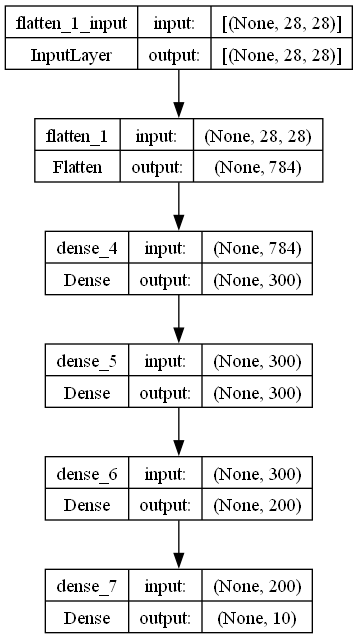

In [28]:
keras.utils.plot_model(model, "my_model.png", show_shapes=True)

In [29]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=1e-4),
             metrics="accuracy")

In [30]:
expon_lr = ExponentialLearningRate(factor=1.005)

In [31]:
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid), verbose=1, callbacks=[expon_lr])

1500/1500 [==============================] - 7s 4ms/step - loss: 1.5003 - accuracy: 0.5346 - val_loss: 0.3901 - val_accuracy: 0.8727


In [41]:
history.params

{'verbose': 1, 'epochs': 1, 'steps': 1500}

C:\Users\Admin\AppData\Local\Temp\ipykernel_1748\2250432327.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-1, 1)


(9.999999747378752e-05, 1)

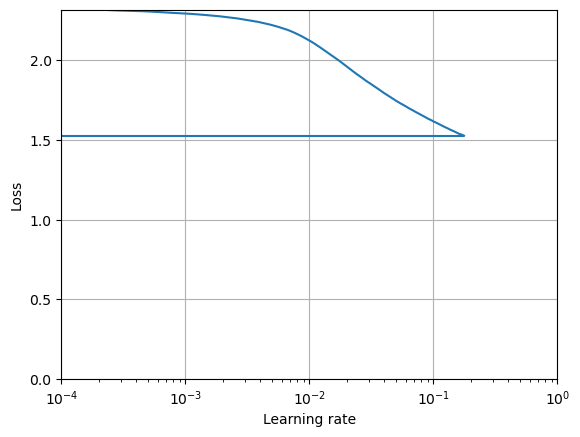

In [27]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.xlim(-1, 1)

In [28]:
model = keras.models.Sequential() # Tạo ra mô hình mạng neural tuần tự
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [30]:
import os
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [31]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [32]:
EarlyStopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [33]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=5e-2),
             metrics="accuracy")

In [34]:
h = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), verbose=1, callbacks=[EarlyStopping, tensorboard_cb])

Epoch 1/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3440 - accuracy: 0.8994 - val_loss: 0.2043 - val_accuracy: 0.9387
Epoch 2/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1385 - accuracy: 0.9588 - val_loss: 0.1170 - val_accuracy: 0.9638
Epoch 3/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0933 - accuracy: 0.9721 - val_loss: 0.0992 - val_accuracy: 0.9693
Epoch 4/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0712 - accuracy: 0.9790 - val_loss: 0.0820 - val_accuracy: 0.9744
Epoch 5/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0529 - accuracy: 0.9840 - val_loss: 0.0896 - val_accuracy: 0.9729
Epoch 6/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0396 - accuracy: 0.9881 - val_loss: 0.0832 - val_accuracy: 0.9747
Epoch 7/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0306 - accuracy: 0.9905 - val_loss: 0.0767 - val_ac

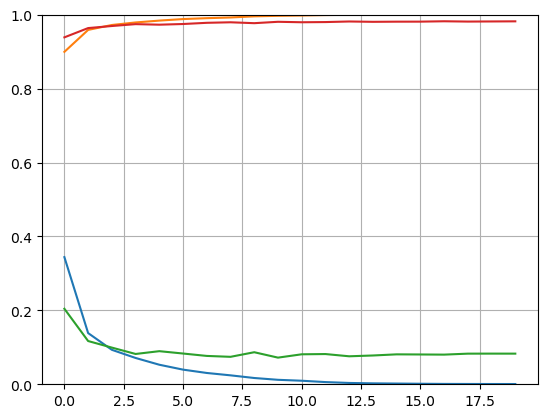

In [36]:
import pandas as pd
plt.plot(pd.DataFrame(h.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0756 - accuracy: 0.9782


[0.0756467804312706, 0.9782000184059143]

In [38]:
import tensorboard
%load_ext tensorboard
%tensorboard --logdir=./my_mnist_logs --port=6006